## License plate detection

In [1]:
!pip install opencv-python numpy matplotlib tensorflow keras scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 75.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 158.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 14.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 142.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 156.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.1 MB/s eta 0:00:00
   

In [7]:
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 139.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
 

In [1]:
import tensorflow as tf
print(tf.__version__)

2024-03-23 14:35:16.197970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 14:35:16.198008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 14:35:16.200475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 14:35:16.479509: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 14:35:18.741436: W tensorflow/compiler/

2.14.0


### Importing Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.gridspec as gridspec
import glob


from os.path import splitext,basename
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import AdamW
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from local_utils import detect_lp

### Function to load character detection model

In [3]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(e)  
wpod_net_path = "./wpod-net.json"
wpod_net = load_model(wpod_net_path)

Model loaded successfully!


### Load Images For Testing

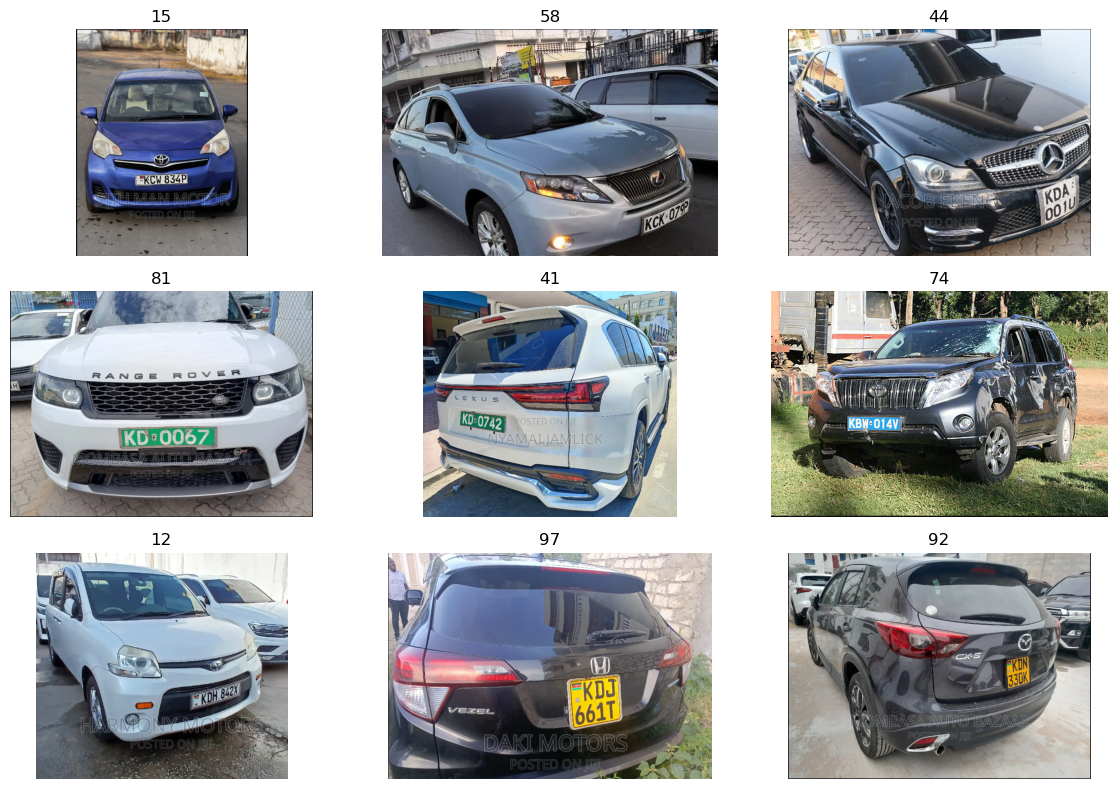

In [4]:
image_paths = glob.glob("Kenyan_Vehicles_License_Plates/*.png")

def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img


fig = plt.figure(figsize=(12, 8))
cols = 3
rows = 3
fig_list = []

for i, image_path in enumerate(image_paths):
    if i >= cols * rows:
        break

    fig_list.append(fig.add_subplot(rows, cols, i + 1))
    title = splitext(basename(image_path))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_path)
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout()
plt.show()

### License plate detection

1/1 [==============================] - 0s 397ms/step
Detect 2 plate in 11
Coordinate of plate in image: 
 [array([[557.44586702, 759.6822572 , 757.56358631, 555.32719613],
       [531.63393497, 479.25946683, 537.60260448, 589.97707262],
       [  1.        ,   1.        ,   1.        ,   1.        ]]), array([[302.44965376, 453.9154668 , 454.25240903, 302.78659599],
       [494.04585424, 498.63336137, 541.651884  , 537.06437686],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


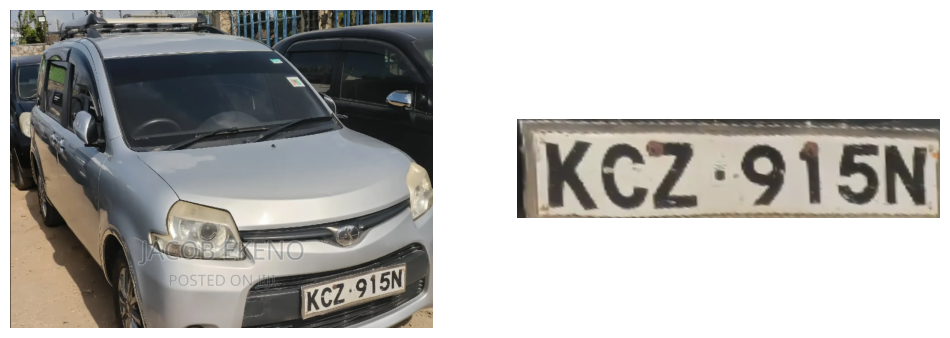

In [27]:
def get_plate(image_path, Dmax=500, Dmin=400):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

# Retrieve license plate image and its coordinates
test_image = image_paths[22]
LpImg,cor = get_plate(test_image)
print("Detect %i plate in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate in image: \n", cor)

# Visualize the image and the extracted plate
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

plt.savefig("Image and License Plate Detection_2.jpg",dpi=300)

### Image Augmentation

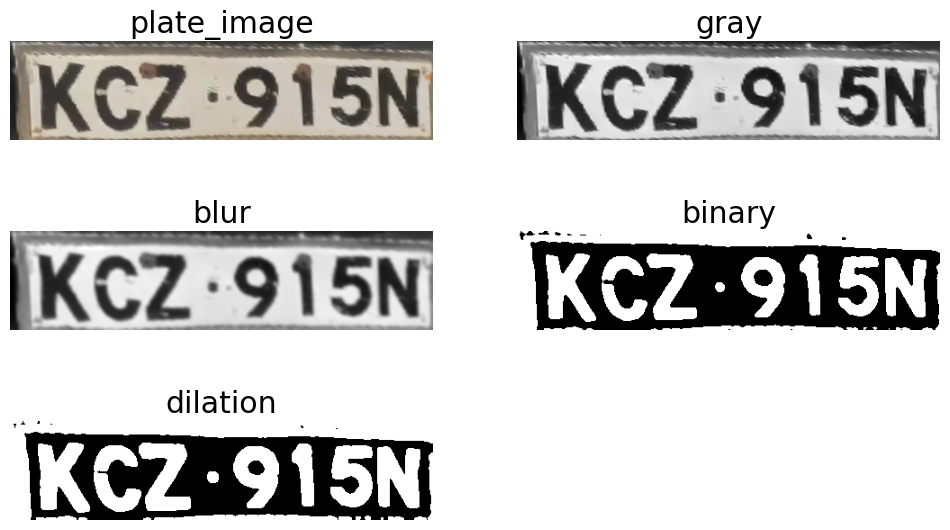

In [28]:
if (len(LpImg)): #check if there is an license image
    # Scale, calculates absolute values, and convert to 8-bit
    plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))

    # grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # inversed binary thresholding and dilating
    binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)


# visualize preprocessed license plate
fig = plt.figure(figsize=(12,7))
plt.rcParams.update({"font.size":18})
grid = gridspec.GridSpec(ncols=2,nrows=3,figure = fig)
plot_image = [plate_image, gray, blur, binary,thre_mor]
plot_name = ["plate_image","gray","blur","binary","dilation"]

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

plt.savefig("License plate preprocessing_2.png", dpi=300)

### Character Detection

Detected 7 characters.


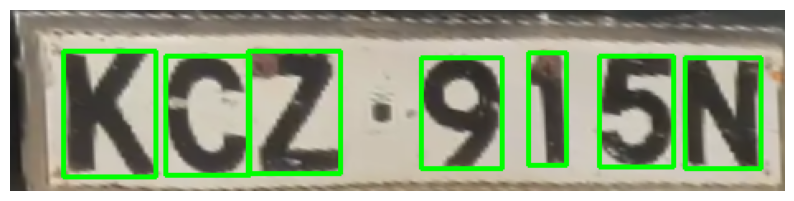

In [29]:
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

test_roi = plate_image.copy()

# a list to append segmented character images
crop_characters = []

# standard filter for width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contours height larger than 50% of the plate
            # Draw bounding box around character
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Seperate characters and append to list
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            # convert characters to binary
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detected {} characters.".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
plt.savefig('Bounded and Segmented Characters_2.png',dpi=300)

### Display the segmented characters in the list one by one, in a grid

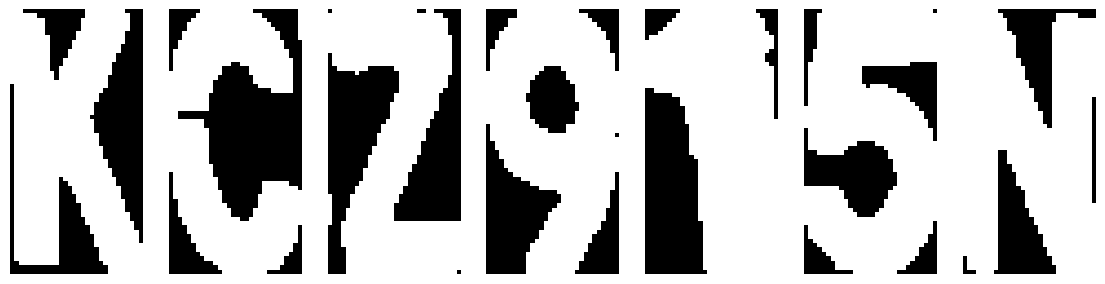

In [30]:
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")
plt.savefig("Segmented Characters_2.png",dpi=300)

### Character Dataset For Training

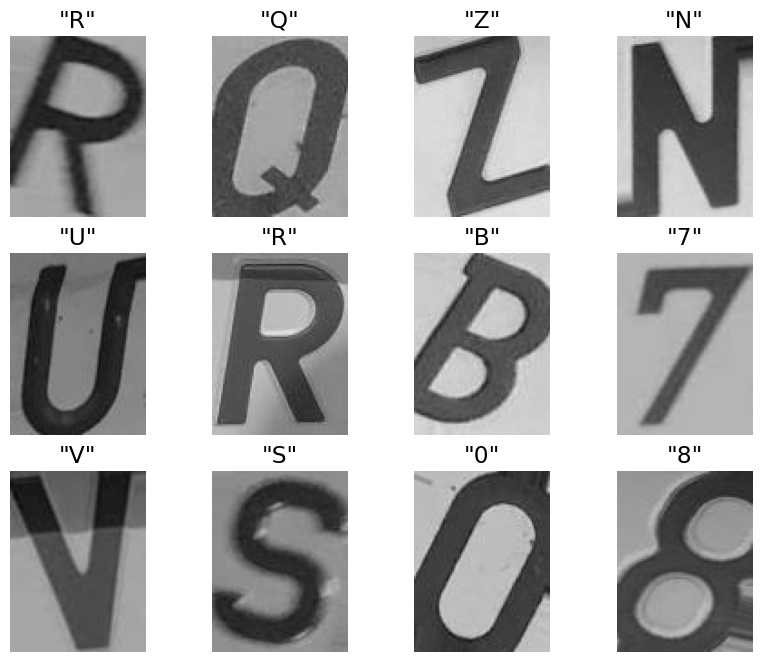

In [11]:
import os

dataset_paths = glob.glob("dataset_characters/CNN_letter_Dataset/**/*.jpg")

cols = 4
rows = 3
fig = plt.figure(figsize=(10, 8))
plt.rcParams.update({"font.size": 14})
grid = gridspec.GridSpec(ncols=cols, nrows=rows, figure=fig)

# Calculate the number of images in the dataset
num_images = len(dataset_paths)

# Check if there are enough images to fill the grid
if num_images >= (cols * rows):
    # Generate random indices
    np.random.seed(45)
    rand = np.random.choice(num_images, size=(cols * rows), replace=False)

    # Plot characters and their labels
    for i in range(cols * rows):
        fig.add_subplot(grid[i])
        image = load_img(dataset_paths[rand[i]])
        label = dataset_paths[rand[i]].split(os.path.sep)[-2]
        plt.title('"{:s}"'.format(label))
        plt.axis(False)
        plt.imshow(image)

    plt.savefig("Sample of Dataset Characters.png", dpi=300)
else:
    print("Not enough images in the dataset to fill the grid.")

### Image Preprocessing for Modelling

In [13]:
X=[]# character data in array form
labels=[]# labels

for image_path in dataset_paths:
    label = image_path.split(os.path.sep)[-2]
    image=load_img(image_path,target_size=(80,80))
    image=img_to_array(image)

    X.append(image)
    labels.append(label)

X = np.array(X,dtype="float16")
labels = np.array(labels)

print("Found {:d} images with {:d} classes".format(len(X),len(set(labels))))


# encode the labels for equal representation
lb = LabelEncoder()
lb.fit(labels)
labels = lb.transform(labels)
y = to_categorical(labels)

# save label file for reuse
np.save('license_character_classes.npy', lb.classes_)

# split 10% of data as validation set
# (trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# data augumentation to diversify the training set
# image_gen = ImageDataGenerator(rotation_range=10,
#                               width_shift_range=0.1,
#                               height_shift_range=0.1,
#                               shear_range=0.1,
#                               zoom_range=0.1,
#                               fill_mode="nearest"
#                               )

Found 35500 images with 35 classes


### Creating a Model

In [14]:
def create_model(learning_rate=1e-4, decay=1e-4/25, training=False, output_shape=y.shape[1]):
    baseModel = MobileNetV2(weights="imagenet",
                            include_top=False,
                            input_tensor=Input(shape=(80, 80, 3)))

    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(3, 3))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(output_shape, activation="softmax")(headModel)

    model = Model(inputs=baseModel.input, outputs=headModel)

    if training:
        # Define trainable layers in the base model
        for layer in baseModel.layers:
            layer.trainable = True

        # Compile the model with learning rate and loss function
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

# Initialize hyperparameters
INIT_LR = 1e-4

In [15]:
EPOCHS = 20
BATCH_SIZE = 300

In [16]:
model = create_model(learning_rate=INIT_LR, decay=INIT_LR/EPOCHS, training=True)

### Training the model

In [17]:
!pip install tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 21.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 8.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 11.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 74.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 47.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 30.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.5/549.5 MB 12.7 MB/s eta 0:00:0000:0100:01

[notice] A ne

In [17]:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

2024-03-23 15:56:22.612752: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 15:56:22.612814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 15:56:22.612899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 15:56:22.621536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 15:56:24.769469: W tensorflow/compiler/

In [ ]:
my_checkpointer = [
                EarlyStopping(monitor='val_loss', patience=5, verbose=0),
                ModelCheckpoint(filepath="License_character_recognition_weight_.h5", verbose=1, save_weights_only=True)
                ]

# Check if GPU is available
if tf.test.is_gpu_available():
    print('GPU is available')
else:
    print('GPU is not available')

# Set the GPU device to use
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Set visible devices
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), 'Physical GPUs,', len(logical_gpus), 'Logical GPU')
    except RuntimeError as e:
        print(e)

# Rest of your code for training the model
result = model.fit(image_gen.flow(trainX, trainY, batch_size=BATCH_SIZE),
                   steps_per_epoch=len(trainX) // BATCH_SIZE,
                   validation_data=(testX, testY),
                   validation_steps=len(testX) // BATCH_SIZE,
                   epochs=EPOCHS, callbacks=my_checkpointer)

GPU is not available


2024-03-21 12:03:16.851154: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
106/106 [==============================] - ETA: 0s - loss: 2.0928 - accuracy: 0.4476
Epoch 1: saving model to License_character_recognition_weight_.h5
106/106 [==============================] - 256s 2s/step - loss: 2.0928 - accuracy: 0.4476 - val_loss: 3.5376 - val_accuracy: 0.2946
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 0.2642 - accuracy: 0.9370
Epoch 2: saving model to License_character_recognition_weight_.h5
106/106 [==============================] - 245s 2s/step - loss: 0.2642 - accuracy: 0.9370 - val_loss: 2.4876 - val_accuracy: 0.5623
Epoch 3/20
106/106 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9861
Epoch 3: saving model to License_character_recognition_weight_.h5
106/106 [==============================] - 242s 2s/step - loss: 0.0612 - accuracy: 0.9861 - val_loss: 1.5041 - val_accuracy: 0.7321
Epoch 4/20
106/106 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9938
Epoch 4: saving model 

In [14]:
# my_checkpointer = [
#                 EarlyStopping(monitor='val_loss', patience=5, verbose=0),
#                 ModelCheckpoint(filepath="License_character_recognition_weight_.h5", verbose=1, save_weights_only=True)
#                 ]

# result = model.fit(image_gen.flow(trainX, trainY, batch_size=BATCH_SIZE),
#                    steps_per_epoch=len(trainX) // BATCH_SIZE,
#                    validation_data=(testX, testY),
#                    validation_steps=len(testX) // BATCH_SIZE,
#                    epochs=EPOCHS, callbacks=my_checkpointer)

### Model Validation

In [ ]:
fig = plt.figure(figsize=(14,5))
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(result.history['accuracy'], label='training accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(result.history['loss'], label='training loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig("Training and Validation Curves.jpg",dpi=300)

### Prediction

Model loaded successfully!
Labels loaded successfully!
1/1 [==============================] - 0s 23ms/step
YC1GC3N


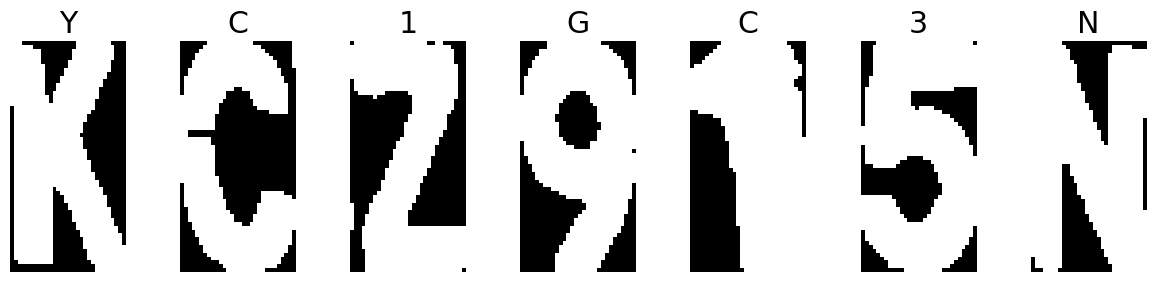

In [31]:
model_json = model.to_json()
with open("MobileNets_character_recognition_model.json", "w") as json_file:
  json_file.write(model_json)
json_file = open('MobileNets_character_recognition_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight_.h5")
print("Model loaded successfully!")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("Labels loaded successfully!")

def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction
# display the each of segmented characters in a grid and the predicted labels as the title.
fig = plt.figure(figsize=(15,3))
cols = len(crop_characters)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(crop_characters):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=10))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print(final_string)
plt.savefig('Recognized License Plate_2.png', dpi=300)